In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

from astropy.io import fits
from astropy.io import ascii

In [2]:
from astroplan.plots import plot_airmass
from astroplan import Observer
from astroplan import FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
from astroplan import is_observable, is_always_observable, months_observable
observer = Observer.at_site('palomar')
from astroplan import EclipsingSystem
from astropy.timeseries import LombScargle

In [3]:
lightcurve_ztf = Table.from_pandas(pd.read_csv("J183118.csv"))

In [4]:
row = lightcurve_ztf
hjd = np.array(row["mjd"])
hjd = hjd.astype("float")
hjd = hjd * u.day
mag = np.array(row["mag"])
for i in range(len(mag)):
    if(">" in str(mag[i])):
        mag[i] = mag[i][1:-1]
mag = np.asarray(mag)
mag = mag.astype("float")
mag = mag * u.mag
mag_err = np.array(row["magerr"])
mag_err = mag_err.astype("float")
mag_err = mag_err * u.mag

In [5]:
ztf_period = 0.110375275900
ztf_frequency = 1/ztf_period
ztf_frequency

9.06000000313476

In [12]:
ideal_frequency = np.linspace(1, 3, 10**6) * (1/u.day)

In [13]:
power = LombScargle(hjd, mag , mag_err).power(ideal_frequency)

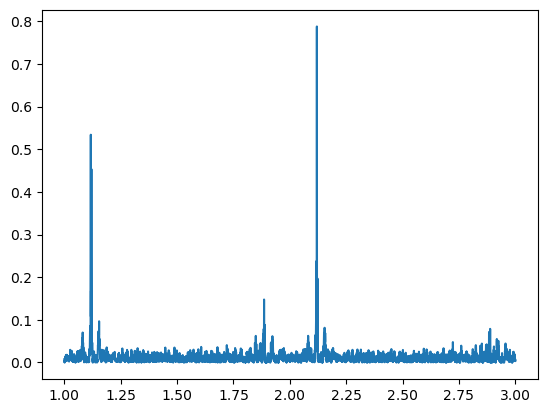

In [14]:
plt.plot(ideal_frequency, power)
#plt.vlines(ztf_frequency, 0, np.max(power), color = "red")

In [15]:
ztf_f = ideal_frequency[np.argmax(power)]
ztf_p = 1/ztf_f
ztf_p

<Quantity 0.47172946 d>

Text(0, 0.5, 'R Mag')

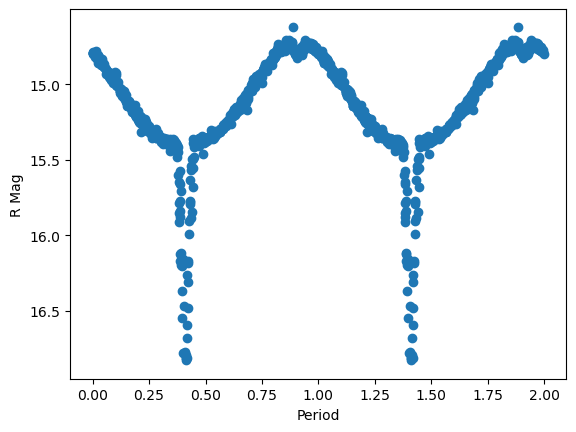

In [16]:
hjd_p_fold = hjd % ztf_p / ztf_p
hjd_p_fold = np.append(hjd_p_fold, 1 + hjd_p_fold)
mag_p_fold = np.append(mag, mag)
mag_err_p_fold = np.append(mag_err, mag_err)
plt.errorbar(hjd_p_fold, mag_p_fold, mag_err_p_fold, fmt = "o")
#plt.xlim(0.35,0.46)
#plt.ylim(15.25, 16.9)
plt.gca().invert_yaxis()

plt.xlabel("Period")
plt.ylabel("R Mag")

Text(0, 0.5, 'R Mag')

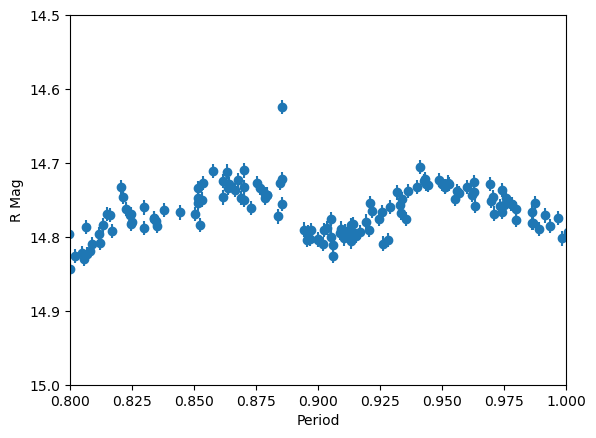

In [22]:
hjd_p_fold = hjd % ztf_p / ztf_p
hjd_p_fold = np.append(hjd_p_fold, 1 + hjd_p_fold)
mag_p_fold = np.append(mag, mag)
mag_err_p_fold = np.append(mag_err, mag_err)
plt.errorbar(hjd_p_fold, mag_p_fold, mag_err_p_fold, fmt = "o")
plt.xlim(0.8,1.)
plt.ylim(14.5, 15)
plt.gca().invert_yaxis()

plt.xlabel("Period")
plt.ylabel("R Mag")

In [20]:
eclipsing = lightcurve_ztf[np.argmax(lightcurve_ztf["mag"])]
eclipsing["mjd"] * u.day % ztf_p / ztf_p

<Quantity 0.41174095>

In [12]:
primary_eclipse_time = Time(eclipsing["mjd"], format='mjd')
orbital_period = ztf_p
eclipse_duration = 0.06 * ztf_p
eclipse_duration

<Quantity 0.02830377 d>

In [16]:
objects = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name='J183118')
np.save("J183118", np.array([objects]))

In [14]:
observing_time = Time('2023-05-05 6:00')
objects.next_primary_eclipse_time(observing_time, n_eclipses = 8)

<Time object: scale='utc' format='iso' value=['2023-05-05 06:43:40.921' '2023-05-05 18:02:58.346'
 '2023-05-06 05:22:15.772' '2023-05-06 16:41:33.197'
 '2023-05-07 04:00:50.623' '2023-05-07 15:20:08.048'
 '2023-05-08 02:39:25.473' '2023-05-08 13:58:42.899']>

In [15]:
objects.next_secondary_eclipse_time(observing_time, n_eclipses = 8)

<Time object: scale='utc' format='iso' value=['2023-05-05 12:23:19.634' '2023-05-05 23:42:37.059'
 '2023-05-06 11:01:54.484' '2023-05-06 22:21:11.910'
 '2023-05-07 09:40:29.335' '2023-05-07 20:59:46.761'
 '2023-05-08 08:19:04.186' '2023-05-08 19:38:21.612']>